<a href="https://colab.research.google.com/github/Brian13Noble/GIS/blob/main/map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Colab is an online place (cloud) for running Python notebooks--we will use it to run our code :)

You can just edit and adjust and and run the notebook I gave you [this file!]: don't forget to first save it!!!: File-Save a copy in GitHub

And after adjusting to run with your own data, you can submit it as ps :)

After making edits, while can diff on GitHub, its clunky, better here: File-Revision History

(a sidenote: File-Download it and convert to pdf: https://2pdf.com/convert-ipynb-to-pdf)

make webbrowser fullscreen and collapse upper menu (arrow on the right), especially on laptop

In [79]:
import os, zipfile #basics
import pandas as pd #data management
import matplotlib.pyplot as plt #vis

import geopandas as gpd #gis/maps

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files #to download from colab onto hd

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

In [80]:
!pip install mapclassify
import mapclassify #need for thematic map classification

https://geopandas.org/

a sister of pandas; does the job; tho not as fancy-interactive as folium or leafmap

just quick focus here on thematic/choloropleth maps: coloring polygons (states, counties, etc) with values of a var, say crime: green=low, red=hi

REFS (also good for self study):

https://geopandas.org/en/stable/gallery/choropleths.html

https://geopandas.org/en/stable/gallery/choro_legends.html

### [sep5] mapping your area of interest

say you are interested in NJ counties, so just google that geography + "shapefile", i.e., "NJ counties shapefile"

maps have their own files, a popular one is 'shapefile'--have it zipped--one shapefile consists of several files--keep them in one zipped folder and dont change their names

In [81]:
#i found one and reposted on my website, download it onto colab:
! wget -q -O nj-counties.zip https://docs.google.com/uc?id=1xJDhcRCkgv7k4tNCa72Oog5bohV6dTB2&export=download

zip_ref = zipfile.ZipFile('nj-counties.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
njC0=gpd.read_file('nj_counties.shp') #load the shapefile with gpd as njC

<Axes: >

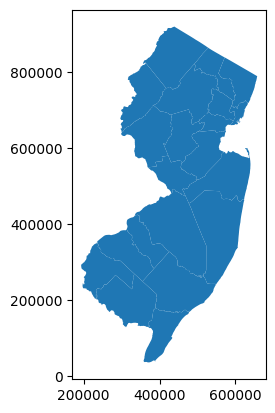

In [82]:
#make the map
njC0.plot()

### [sep12] dive into thematic/choloropleth maps
mapping var from gis datafile--sometimes lucky and have the variable we want to map in the shapefile

thematic or choloropleth maps are they key skill you will learn here--these are maps where we color code polygons (or lines or points) with levels of a variable, say green for low covid19, yellow for moderate, and red for high

In [83]:
! wget -q -O nj-counties.zip https://docs.google.com/uc?id=1xJDhcRCkgv7k4tNCa72Oog5bohV6dTB2&export=download
zip_ref = zipfile.ZipFile('nj-counties.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
njC0=gpd.read_file('nj_counties.shp') #load the shapefile with gpd as njC

In [84]:
njC0.dtypes #with geopandas can do stuff like with pandas :)

COUNTY          object
COUNTY_LAB      object
CO              object
GNIS_NAME       object
GNIS            object
FIPSSTCO        object
FIPSCO          object
ACRES          float64
SQ_MILES       float64
POP2010          int64
POP2000          int64
POP1990          int64
POP1980          int64
POPDEN2010       int64
POPDEN2000       int64
POPDEN1990       int64
POPDEN1980       int64
REGION          object
Shape_Leng     float64
Shape_Area     float64
geometry      geometry
dtype: object

In [85]:
njC0.head(2)

,COUNTY,COUNTY_LAB,CO,GNIS_NAME,GNIS,FIPSSTCO,FIPSCO,ACRES,SQ_MILES,POP2010,...,POP1990,POP1980,POPDEN2010,POPDEN2000,POPDEN1990,POPDEN1980,REGION,Shape_Leng,Shape_Area,geometry
0,ATLANTIC,Atlantic County,ATL,County of Atlantic,882270,34001,1,390815.404215,610.649069,274549,...,275372,204615,450,414,451,335,COASTAL,650228.153906,1.702385e+10,"POLYGON ((443056.010 311529.770, 443068.440 31..."
1,BERGEN,Bergen County,BER,County of Bergen,882271,34003,3,153490.275182,239.828555,905116,...,829592,849843,3774,3686,3459,3544,NORTHEASTERN,443326.122021,6.686010e+09,"POLYGON ((656200.963 783614.366, 656141.127 78..."


In [86]:
#keep it simple!
njC=njC0[['COUNTY','COUNTY_LAB','POP2010','POPDEN2010','geometry']]

<Axes: >

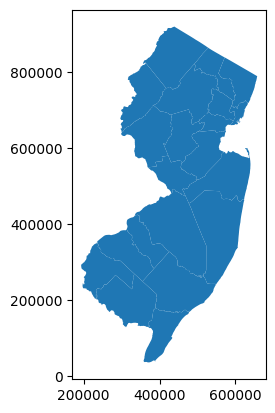

In [87]:
njC.plot() #yay love the shape

<Axes: >

[]

[]

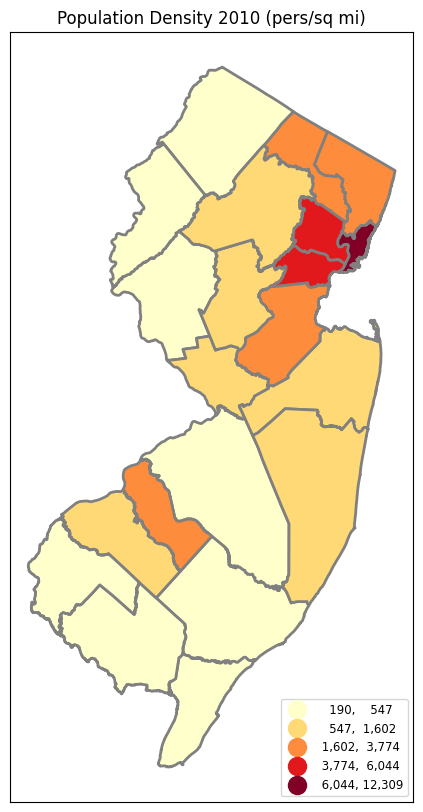

In [88]:
#your first thematic map! :) lets unpack options real quick esp fmt for dec pts; more later under 'bells and whistles'
fig, ax = plt.subplots(1, figsize=(6,10))
njC.plot(ax=ax,column='POPDEN2010',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
#leg1 = ax.get_legend()
#leg1.set_title('''Population Density
#2010 (pers/sq mi)''')
ax.title.set_text("Population Density 2010 (pers/sq mi)")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
#plt.savefig('fig.pdf',bbox_inches='tight') #,pad_inches=0.1, dpi=200, transparent=True #eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
#files.download('fig.pdf') #note can also right click fig and save image as

In [89]:
# we can overlay layers; lets get nj uni shapefile on it
!wget -q -O col.zip  https://docs.google.com/uc?id=1bb9KES6QDE7cleE4L38yQ7939LlXUHB5&export=download
zip_ref = zipfile.ZipFile('col.zip', 'r');zip_ref.extractall(); zip_ref.close()

col = gpd.read_file('2007_11_30_NJ_COLL_UNIV_njsp.shp')
col.dtypes
col.head(3)

ID              object
METLNKID        object
FEATTYPE        object
SECCLASS        object
NAME            object
AREA            object
PHONE           object
ADDRESS         object
ADDRESS2        object
CITY            object
STATE           object
ZIP             object
ZIPP4           object
COUNTY          object
FIPS            object
DIRECTIONS      object
EMERGTITLE      object
EMERGPHONE      object
EMERGEXT        object
CONTDATE        object
CONTHOW         object
GEODATE         object
GEOHOW          object
NAICSCODE       object
NAICSDESCR      object
GEOLINKID       object
X              float64
Y              float64
ST_VENDOR       object
ST_VERSION      object
GEOPREC         object
PHONELOC        object
QC_QA           object
DEGREE          object
ENROLL          object
geometry      geometry
dtype: object

,ID,METLNKID,FEATTYPE,SECCLASS,NAME,AREA,PHONE,ADDRESS,ADDRESS2,CITY,...,X,Y,ST_VENDOR,ST_VERSION,GEOPREC,PHONELOC,QC_QA,DEGREE,ENROLL,geometry
0,10273936,None,POINT,UNCLASSIFIED,RAMAPO COLLEGE OF NEW JERSEY,201,684-7500,505 RAMAPO VALLEY RD,None,MAHWAH,...,-74.177826,41.082642,NAVTEQ,2006Q4,BLOCKFACE,None,None,MASTER'S DEGREE,5538,POINT (580936.143 819465.262)
1,10273934,None,POINT,UNCLASSIFIED,NEW BRUNSWICK THEOLOGICAL SEMINARY,732,247-5241,17 SEMINARY PL,None,NEW BRUNSWICK,...,-74.448814,40.501346,NAVTEQ,2006Q4,BLOCKFACE,None,None,DOCTOR'S DEGREE,203,POINT (506358.894 607539.257)
2,10273932,None,POINT,UNCLASSIFIED,MONMOUTH UNIVERSITY,732,571-3400,400 CEDAR AVE,None,WEST LONG BRANCH,...,-74.003765,40.281505,NAVTEQ,2006Q4,BLOCKFACE,None,None,POST-MASTER'S CERTIFICATE,6351,POINT (630565.964 527840.459)


In [90]:
col['enr'] = col.ENROLL.astype(float)

<Axes: >

<Axes: >

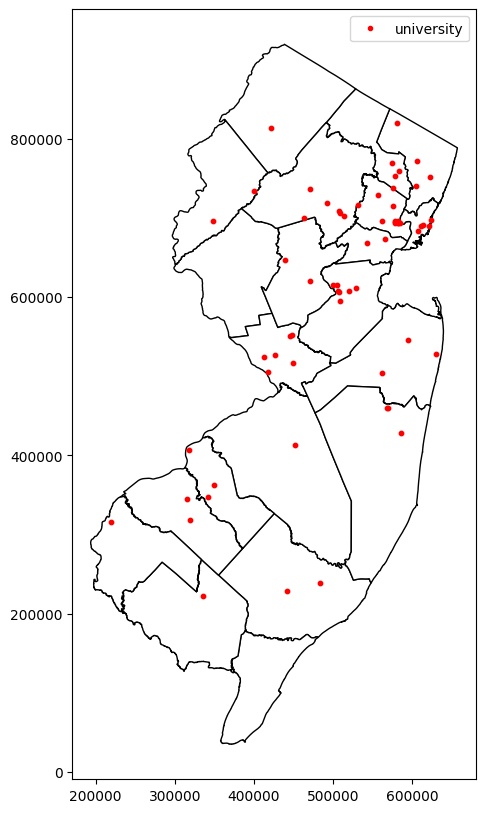

In [91]:
#and now overlay: just use plot fn twice
fig, ax = plt.subplots(1, figsize=(6,10))
njC.plot(ax=ax, color='white', edgecolor='black',linewidth=1)
col.plot(ax=ax, marker='o', color='red', markersize=10,legend=True)
#col.plot(column='enr',markersize=50,legend=True,cmap='RdYlGn_r',scheme='QUANTILES',k=5,ax=ax)
#ax.set_title('Watersheds by area ($mi^2$)')

#custom legend
#https://stackoverflow.com/questions/39500265/how-to-manually-create-a-legend
#import matplotlib.patches as mpatches
#red_patch = mpatches.Patch(color='red', label='The red data')
from matplotlib.lines import Line2D
point = Line2D([0], [0], label='university', marker='o', markersize=3,
         markeredgecolor='r', markerfacecolor='r', linestyle='')
plt.legend(handles=[point])

## join/merge
 awesome power! use it a lot

make it easy on yourself! be happy! work smart not hard! so simplify or subset:
say instead of 200 little indian regions just do 20 big provinces; and instead of 10 convoluted variables, just do 5 variables<br>

merge may get difficult (especially if difficult data so again simplify), but if you need more powerful reference see:

https://colab.research.google.com/github/theaok/datManPy/blob/main/pandas.ipynb#scrollTo=dMPPOPS92WkA

<br>

 <br>we will cover how to map multiple variables in one map  later; for now just use 2 separate maps; and calculate new variables! for instance instead of having 2 maps for crime in 1970 and 2000 just have percent difference: 100*(crim2000-crim1970)/crim1970

### housing/zillow example

say want to map housing values across nj counties

first need to get the map with counties (already got it)

then get regular data with housing values and merge with counties data

and finaly color code the polygons with housing values




we've got housing prices for NJ counties from zillow (http://www.zillow.com/research/data):

https://github.com/theaok/data/raw/main/NJ-counties-Zillow-Home-Value-Index-TimeSeries.xls



adjust ID: make counties uppercase (or could drop 'County' from COUNTY LABEL variable)

make col (var) names short: eg =<5 alphanumeric chars

and clean up:  drop first row if junk in it, excessive columns, \$ \%,\#, etc

code everything so the end product is like:

https://raw.githubusercontent.com/theaok/data/main/all_homes.csv


#### zillow dat man
(again note can collapse and run all at once)

In [92]:
zilXls=pd.read_excel('https://github.com/theaok/data/raw/main/NJ-counties-Zillow-Home-Value-Index-TimeSeries.xls')

In [93]:
zilXls.head(2)

,NJ Zillow Home Value Index - All Homes,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 194,Unnamed: 195,Unnamed: 196,Unnamed: 197,Unnamed: 198,Unnamed: 199,Unnamed: 200,Unnamed: 201,Unnamed: 202,Unnamed: 203
0,Region Name,Region Type,Data Type,1996-04-15 00:00:00,1996-05-15 00:00:00,1996-06-15 00:00:00,1996-07-15 00:00:00,1996-08-15 00:00:00,1996-09-15 00:00:00,1996-10-15 00:00:00,...,2012-03-15 00:00:00,2012-04-15 00:00:00,2012-05-15 00:00:00,2012-06-15 00:00:00,2012-07-15 00:00:00,2012-08-15 00:00:00,2012-09-15 00:00:00,2012-10-15 00:00:00,2012-11-15 00:00:00,2012-12-15 00:00:00
1,New Jersey,state,All Homes,130200,129700,129700,130000,129500,128400,130300,...,256600,257000,257000,257100,256600,256100,256900,258300,259100,259700


In [94]:
zilXls.dtypes

NJ Zillow Home Value Index - All Homes    object
Unnamed: 1                                object
Unnamed: 2                                object
Unnamed: 3                                object
Unnamed: 4                                object
                                           ...  
Unnamed: 199                              object
Unnamed: 200                              object
Unnamed: 201                              object
Unnamed: 202                              object
Unnamed: 203                              object
Length: 204, dtype: object

In [95]:
zilXls1=zilXls[['NJ Zillow Home Value Index - All Homes','Unnamed: 203']]
zilXls1.rename(columns={'NJ Zillow Home Value Index - All Homes': 'county'}, inplace=True)
zilXls1.rename(columns={'Unnamed: 203': 'dec2012'}, inplace=True)
zilXls1

<ipython-input-95-94c1518d9d8d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zilXls1.rename(columns={'NJ Zillow Home Value Index - All Homes': 'county'}, inplace=True)
<ipython-input-95-94c1518d9d8d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zilXls1.rename(columns={'Unnamed: 203': 'dec2012'}, inplace=True)


,county,dec2012
0,Region Name,2012-12-15 00:00:00
1,New Jersey,259700
2,Atlantic,185800
3,Bergen,380000
4,Burlington,197800
5,Camden,149400
6,Cape May,313600
7,Cumberland,120100
8,Essex,282800
9,Gloucester,175900


In [96]:
zilXls2=zilXls1.iloc[1:, :]
zilXls2 #note missing val for Morris; always think abt missing data!

,county,dec2012
1,New Jersey,259700
2,Atlantic,185800
3,Bergen,380000
4,Burlington,197800
5,Camden,149400
6,Cape May,313600
7,Cumberland,120100
8,Essex,282800
9,Gloucester,175900
10,Hudson,293100


In [97]:
zilXls2['COUNTY']=zilXls2['county'].str.upper()
zil1=zilXls2
zil1

<ipython-input-97-b182bc7d4f0b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zilXls2['COUNTY']=zilXls2['county'].str.upper()


,county,dec2012,COUNTY
1,New Jersey,259700,NEW JERSEY
2,Atlantic,185800,ATLANTIC
3,Bergen,380000,BERGEN
4,Burlington,197800,BURLINGTON
5,Camden,149400,CAMDEN
6,Cape May,313600,CAPE MAY
7,Cumberland,120100,CUMBERLAND
8,Essex,282800,ESSEX
9,Gloucester,175900,GLOUCESTER
10,Hudson,293100,HUDSON


In [98]:
#obsolete (was loading cleaned up already data without cleaning in py)
#!wget -q -O zillow.csv  https://docs.google.com/uc?id=1Q4tCZT0EfaJP_WGwKcxuPaQ_dDFonW4E&export=download
#!wget -q -O zil0.csv https://raw.githubusercontent.com/theaok/data/main/all_homes.csv
#zil0=pd.read_csv('zil0.csv')
#zil0.head(3)
#zil1=zil0[['UPPER','Dec 2012']]
#zil1.rename(columns={'UPPER': 'COUNTY'}, inplace=True) #fix col names to match 1st dataset
#zil1 #note missing val for Morris; always think abt missing data!

#### zillow merge and map

In [99]:
#merge
njC1 = pd.merge(njC, zil1, on='COUNTY',how='outer',indicator=True) #(make sure to have njC shapefile from previous sec)
njC1[['COUNTY','dec2012','POPDEN2010','_merge']] #all good, NEW JERSEY expected not to merge

njC2 = pd.merge(njC, zil1, on='COUNTY',how='inner',indicator=False) #so do 'inner' that will only keep the exact matches

,COUNTY,dec2012,POPDEN2010,_merge
0,ATLANTIC,185800,450.0,both
1,BERGEN,380000,3774.0,both
2,BURLINGTON,197800,547.0,both
3,CAMDEN,149400,2257.0,both
4,CAPE MAY,313600,340.0,both
5,CUMBERLAND,120100,313.0,both
6,ESSEX,282800,6044.0,both
7,GLOUCESTER,175900,857.0,both
8,HUDSON,293100,12309.0,both
9,HUNTERDON,327000,293.0,both


<Axes: >

[]

[]

Text(0.5, 80.7222222222222, 'source/definition: zillow.com/research/data')

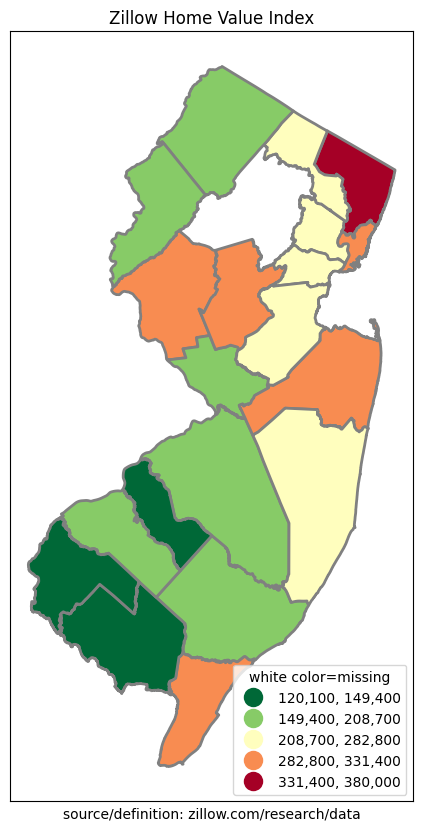

In [100]:
fig, ax = plt.subplots(1, figsize=(6,10))
njC2.plot(ax=ax,column='dec2012',legend=True,cmap='RdYlGn_r',
          scheme='natural_breaks',k=5, edgecolor='grey',linewidth=2,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
leg1 = ax.get_legend()
leg1.set_title('''white color=missing''')
ax.title.set_text("Zillow Home Value Index")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_xlabel('''source/definition: zillow.com/research/data''')
#plt.savefig('fig.pdf',bbox_inches='tight') #,pad_inches=0.1, dpi=200, transparent=True #eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
#files.download('fig.pdf') #note can also right click fig and save image as

### [sep14] abortions example

In [101]:
# get data: https://data.guttmacher.org/ has a nice API
# can click thru to get the table we want, which results in url (can open in webbrowser):
# https://data.guttmacher.org/counties/table?county=34001+34003+34005+34007+34009+34011+34013+34015+34017+34019+34021+34023+34025+34027+34029+34031+34033+34035+34037+34039+34041&topics=244+247&dataset=data&state=NJ
# and then can right click on 'download xls' (csv is messy in this case) button under the table and 'copy link address' and paste into wget (need quotes!):
!wget -q -O njAb0.xls  "https://data.guttmacher.org/download?locationType=county&visualization=datatable&topic=244+247&locations=34001+34003+34005+34007+34009+34011+34013+34015+34017+34019+34021+34023+34025+34027+34029+34031+34033+34035+34037+34039+34041&measures=424+425+426+427+428+429+436+437+438+439+440+441+442&totalKey=NJ"

In [102]:
# alternatively can scrap the table
#import requests
#url = 'https://data.guttmacher.org/counties/table?county=34001+34003+34005+34007+34009+34011+34013+34015+34017+34019+34021+34023+34025+34027+34029+34031+34033+34035+34037+34039+34041&topics=244+247&dataset=data&state=NJ'
#header = {
#  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
#  "X-Requested-With": "XMLHttpRequest"
#}
#r = requests.get(url, headers=header)
#pd.read_html(r.text,match='U.S. County',flavor=None)[0].head(3) #for match just putting name of first col

In [103]:
njAb0=pd.read_excel('njAb0.xls')
njAb0.head(3)
njAb0.columns

,U.S. County,"Total no. of female contraceptive clients served at publicly funded clinics, 2015 [1]","Total publicly funded clinics, 2015 [1]","No. of federally qualified health centers, 2015 [1]","Total no. of female contraceptive clients served at publicly funded clinics, younger than 20, 2015 [1]","No. of female contraceptive clients served at federally qualified health centers, 2015 [1]","No. of health department clinics, 2015 [1]","No. of female contraceptive clients served at health department clinics, 2015 [1]","No. of hospital-based clinics, 2015 [1]","No. of Planned Parenthood clinics, 2015 [1]","No. of female contraceptive clients served at hospital-based clinics, 2015 [1]","No. of female contraceptive clients served at Planned Parenthood clinics, 2015 [1]","No. of other clinics, 2015 [1]","No. of female contraceptive clients served at other clinics, 2015 [1]"
0,NJ Total,"109,940",121,75,"16,880","35,510",2,880,8,26,"5,840","59,530",10,"8,190"
1,Atlantic,"3,300",6,4,670 [2],"2,000",0,0,0,2,0,"1,300",0,0
2,Bergen,"10,380",6,3,"1,000","2,790",0,0,1,2,780,"6,810",0,0


Index(['U.S. County',
       'Total no. of female contraceptive clients served at publicly funded clinics, 2015 [1]',
       'Total publicly funded clinics, 2015 [1]',
       'No. of federally qualified health centers, 2015 [1]',
       'Total no. of female contraceptive clients served at publicly funded clinics, younger than 20, 2015 [1]',
       'No. of female contraceptive clients served at federally qualified health centers, 2015 [1]',
       'No. of health department clinics, 2015 [1]',
       'No. of female contraceptive clients served at health department clinics, 2015 [1]',
       'No. of hospital-based clinics, 2015 [1]',
       'No. of Planned Parenthood clinics, 2015 [1]',
       'No. of female contraceptive clients served at hospital-based clinics, 2015 [1]',
       'No. of female contraceptive clients served at Planned Parenthood clinics, 2015 [1]',
       'No. of other clinics, 2015 [1]',
       'No. of female contraceptive clients served at other clinics, 2015 [1]'],
   

In [104]:
njAb=njAb0[['U.S. County','Total publicly funded clinics, 2015 [1]']] #keep it simple

In [105]:
#look at shapefile cnty names
njC.COUNTY_LAB #(make sure to have njC shapefile from previous sec)

0       Atlantic County
1         Bergen County
2     Burlington County
3         Camden County
4       Cape May County
5     Cumberland County
6          Essex County
7     Gloucester County
8         Hudson County
9      Hunterdon County
10        Mercer County
11      Monmouth County
12         Ocean County
13       Passaic County
14         Salem County
15      Somerset County
16        Sussex County
17         Union County
18        Warren County
19        Morris County
20     Middlesex County
Name: COUNTY_LAB, dtype: object

In [106]:
njC['U.S. County']=njC['COUNTY_LAB'].str.replace(' County','') #get rid of ' County' [note space in front of county]
njC['U.S. County']

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


0       Atlantic
1         Bergen
2     Burlington
3         Camden
4       Cape May
5     Cumberland
6          Essex
7     Gloucester
8         Hudson
9      Hunterdon
10        Mercer
11      Monmouth
12         Ocean
13       Passaic
14         Salem
15      Somerset
16        Sussex
17         Union
18        Warren
19        Morris
20     Middlesex
Name: U.S. County, dtype: object

In [107]:
njCAb = pd.merge(njC, njAb, on='U.S. County',how='outer',indicator=True)
njCAb[['COUNTY','Total publicly funded clinics, 2015 [1]','_merge']].head(50) # ok fine just junk from the bottom like sources etc and NJ as state didnt merge, so can do clean inner merge

,COUNTY,"Total publicly funded clinics, 2015 [1]",_merge
0,ATLANTIC,6,both
1,BERGEN,6,both
2,BURLINGTON,4,both
3,CAMDEN,10,both
4,CAPE MAY,4,both
5,CUMBERLAND,6,both
6,ESSEX,15,both
7,GLOUCESTER,3,both
8,HUDSON,14,both
9,HUNTERDON,1,both


In [108]:
njCAb = pd.merge(njC, njAb, on='U.S. County',how='inner',indicator=True) #inner merge
#njCAb

In [109]:
njCAb.dtypes

COUNTY                                       object
COUNTY_LAB                                   object
POP2010                                       int64
POPDEN2010                                    int64
geometry                                   geometry
U.S. County                                  object
Total publicly funded clinics, 2015 [1]      object
_merge                                     category
dtype: object

In [110]:
#need to convert string (object) to numeric (float or int; float is safer can have decimals if needed)
njCAb['publicly funded clinics, 2015'] = njCAb['Total publicly funded clinics, 2015 [1]'].astype(float)

In [111]:
njCAb[['U.S. County','Total publicly funded clinics, 2015 [1]','publicly funded clinics, 2015']]

,U.S. County,"Total publicly funded clinics, 2015 [1]","publicly funded clinics, 2015"
0,Atlantic,6,6.0
1,Bergen,6,6.0
2,Burlington,4,4.0
3,Camden,10,10.0
4,Cape May,4,4.0
5,Cumberland,6,6.0
6,Essex,15,15.0
7,Gloucester,3,3.0
8,Hudson,14,14.0
9,Hunterdon,1,1.0


<Axes: >

[]

[]

Text(0.5, 1.0, 'count of publicly funded abortion clinics, 2015')

Text(0.5, 0.1, 'data from guttmacher.org\n            Publicly Funded Contraceptive Services at U.S. Clinics, 2015, Frost JJ, et al., 2017')

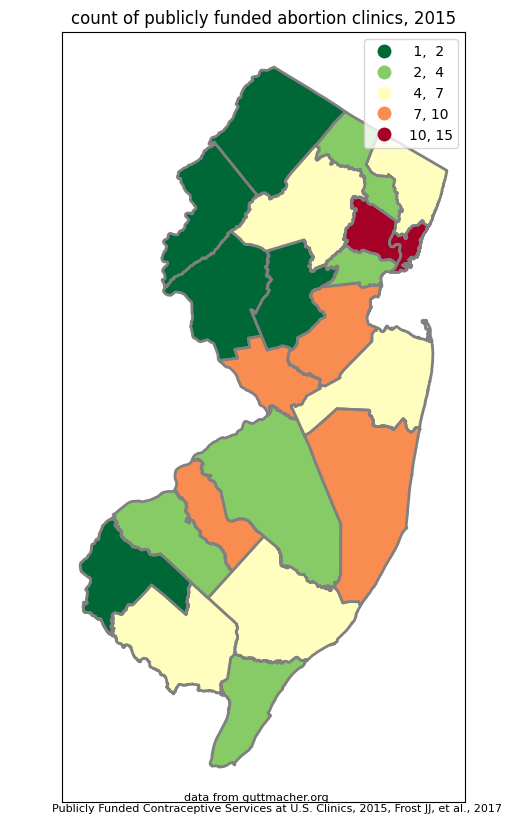

In [112]:
fig, ax = plt.subplots(figsize=(6,10))

njCAb.plot(ax=ax,figsize=(10,12),column='publicly funded clinics, 2015',legend=True,cmap='RdYlGn_r',
          scheme='natural_breaks',k=5, edgecolor='grey',linewidth=2,legend_kwds= {"fmt": "{:,.0f}"})
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_title('count of publicly funded abortion clinics, 2015')
#ax.annotate('Note added to chart with minimum parameters', xy = (200000, 1000))
plt.figtext(0.5, 0.1,
            '''data from guttmacher.org
            Publicly Funded Contraceptive Services at U.S. Clinics, 2015, Frost JJ, et al., 2017''',
            ha="center", fontsize=8, #bbox={"facecolor":"white", "alpha":0.5, "pad":5}
            )

### us census data example

census is a great source of data, even at neigh lev!

for neigh lev (census tracts)  want 5-yr ACS

https://geomap.ffiec.gov/FFIECGeocMap/GeocodeMap1.aspx

https://data.census.gov/cedsci/advanced

Geography: Tract: New Jersey: Camden County: All Census Tracts within Camden County

note: selection appears in the left panel

Topics: Income and Poverty: Poverty: Official Poverty Measure

Years: 2015

Search

click ``POVERTY STATUS IN THE PAST 12 MONTHS''  (ACS2011-2015 S1701)

(take note of margins of errors)

sure can transpose and download as csv but its a mess!




one rule to guide us is to be lazy/work smart, not hard

just find a decent alternative to messy census such as:

socialexplorer.com

ACS 2015-2019

SE:A13003B. Poverty Status in 2019 for Population Age 18 to 64

tracts in camden county nj

https://www.socialexplorer.com/tables/ACS2019_5yr/R13437109

downloaded as csv and reposted:
https://raw.githubusercontent.com/theaok/data/main/R13437109_SL140.csv



In [113]:
!wget -q -O pov0.csv https://raw.githubusercontent.com/theaok/data/main/R13437109_SL140.csv

pov0=pd.read_csv('pov0.csv')
pov0.head(3)

,Geo_FIPS,Geo_GEOID,Geo_NAME,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_FILEID,Geo_LOGRECNO,Geo_US,...,Geo_PCI,Geo_TAZ,Geo_UGA,Geo_BTTR,Geo_BTBG,Geo_PUMA5,Geo_PUMA1,SE_A13003B_001,SE_A13003B_002,SE_A13003B_003
0,34007600200,14000US34007600200,Census Tract 6002,"Census Tract 6002, Camden County, New Jersey",nj,140,0,ACSSF,1761,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1398,405,993
1,34007600400,14000US34007600400,Census Tract 6004,"Census Tract 6004, Camden County, New Jersey",nj,140,0,ACSSF,1762,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1793,725,1068
2,34007600700,14000US34007600700,Census Tract 6007,"Census Tract 6007, Camden County, New Jersey",nj,140,0,ACSSF,1763,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,847,394,453


In [114]:
#as per the above documentation we see prop in pov is SE_A13003B_002/SE_A13003B_001
pov0['pov']=(pov0.SE_A13003B_002/pov0.SE_A13003B_001)*100
pov=pov0[['pov','Geo_NAME']]
pov

,pov,Geo_NAME
0,28.969957,Census Tract 6002
1,40.435025,Census Tract 6004
2,46.517119,Census Tract 6007
3,41.643929,Census Tract 6008
4,47.969656,Census Tract 6009
...,...,...
122,6.073211,Census Tract 6113
123,5.392517,Census Tract 6114
124,5.954142,Census Tract 6115
125,16.037063,Census Tract 6116


get geo data

https://www.census.gov/geo/maps-data/data/tiger-line.html

Download-Web Interface: 2019: Census Tracts: New Jersey

reposted:
https://github.com/theaok/data/raw/main/tl_2019_34_tract.zip

In [115]:
! wget -q -O tracts.zip https://github.com/theaok/data/raw/main/tl_2019_34_tract.zip
zip_ref = zipfile.ZipFile('tracts.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
#! ls
tracts=gpd.read_file('tl_2019_34_tract.shp')

<Axes: >

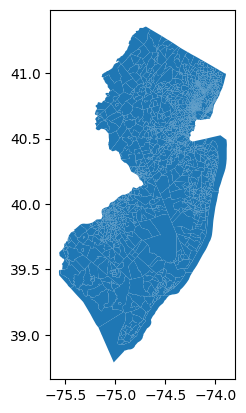

In [116]:
tracts.plot() #humongous, thousands of tracts!

In [117]:
tracts.dtypes

STATEFP       object
COUNTYFP      object
TRACTCE       object
GEOID         object
NAME          object
NAMELSAD      object
MTFCC         object
FUNCSTAT      object
ALAND          int64
AWATER         int64
INTPTLAT      object
INTPTLON      object
geometry    geometry
dtype: object

In [118]:
#tracts.head(3) #commented out because a lot of output; but have a look: geometries: x/y or lat/lon

In [119]:
tracts["COUNTYFP"].value_counts(dropna=False)

013    210
003    179
023    175
017    166
025    144
007    127
029    126
005    114
039    108
031    100
027    100
021     77
001     70
035     68
015     63
037     41
011     35
009     33
019     26
033     25
041     23
Name: COUNTYFP, dtype: int64

google it

https://www.google.com/search?client=firefox-b-1-d&q=nj+counties+fips+codes

https://en.wikipedia.org/wiki/List_of_counties_in_New_Jersey

In [120]:
tractsCam=tracts[tracts.COUNTYFP=='007']

<Axes: >

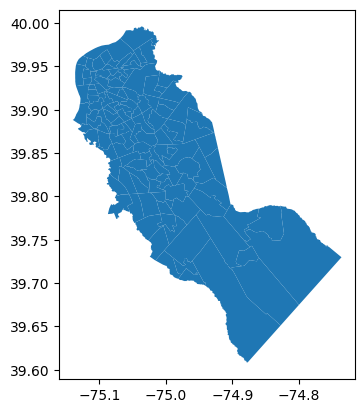

In [121]:
tractsCam.plot() #yay

In [122]:
tractsCam.NAMELSAD

174        Census Tract 6071
175        Census Tract 6072
176        Census Tract 6073
177     Census Tract 6074.01
212        Census Tract 6004
                ...         
1860       Census Tract 6060
1861       Census Tract 6010
1862    Census Tract 6092.05
1863    Census Tract 6082.09
1864    Census Tract 6033.03
Name: NAMELSAD, Length: 127, dtype: object

In [123]:
a1 = pd.merge(tractsCam, pov, left_on='NAMELSAD', right_on='Geo_NAME',how='outer',indicator=True)

In [124]:
a1['_merge'].value_counts() #yay

both          127
left_only       0
right_only      0
Name: _merge, dtype: int64

<Axes: >

[]

[]

Text(0.5, 80.7222222222222, 'source/var def: socialexplorer.com/tables/ACS2019_5yr/R13437109')

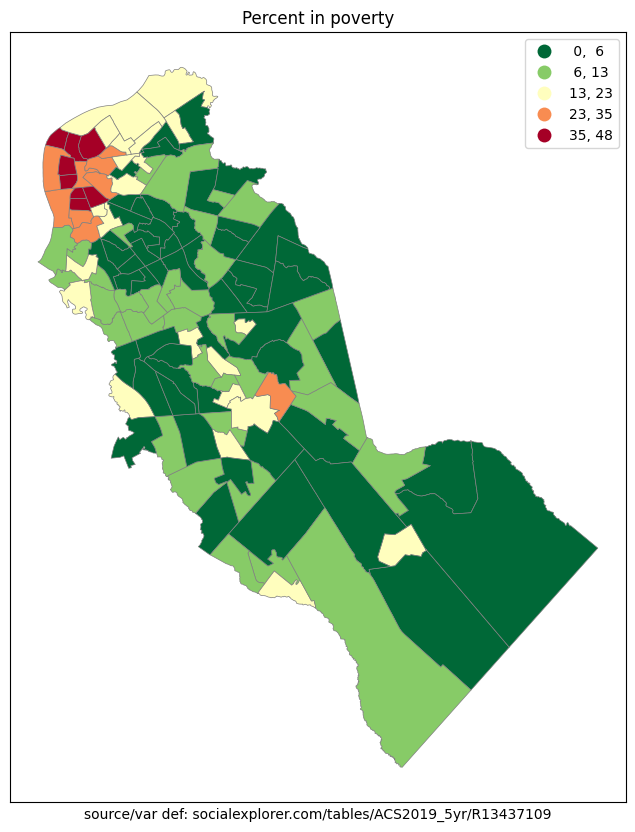

In [125]:
fig, ax = plt.subplots(figsize=(10,10))
a1.plot(ax=ax,column='pov',legend=True,cmap='RdYlGn_r',
          scheme='natural_breaks',k=5, edgecolor='grey',linewidth=.5,legend_kwds= {"fmt": "{:,.0f}"})
ax.title.set_text("Percent in poverty")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_xlabel('''source/var def: socialexplorer.com/tables/ACS2019_5yr/R13437109''')

# [oct3] bells and whistles (geopandas)

we did basic easy mapping, but there's more to it

here not that you have to pick up all of this, just pick whats useful for you!




TODO expand on everything geopandas
TODO do a bit of pandas for dat man




### schemes (classification)


(['boxplot', 'equalinterval', 'fisherjenks', 'fisherjenkssampled', 'headtailbreaks', 'jenkscaspall', 'jenkscaspallforced', 'jenkscaspallsampled', 'maxp', 'maximumbreaks', 'naturalbreaks', 'quantiles', 'percentiles', 'prettybreaks', 'stdmean', 'userdefined'])

<Axes: >

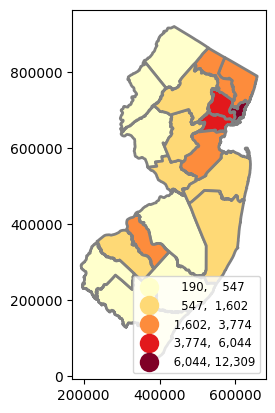

In [126]:
njC.plot(column='POPDEN2010',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4})

<Axes: >

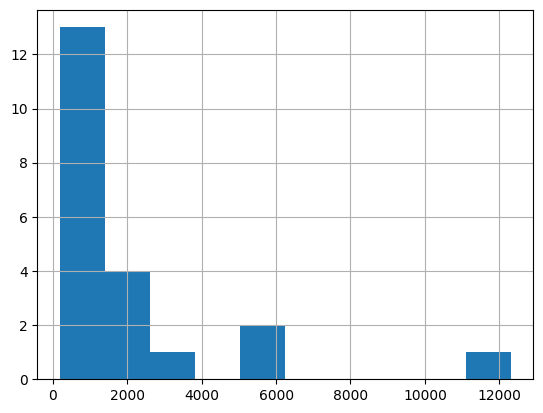

In [127]:
#do think how distribution translate into colors!!
njC.POPDEN2010.hist() #super skewed!

<Axes: >

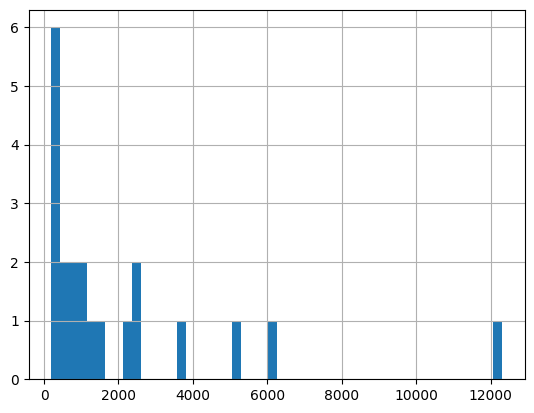

In [128]:
njC.POPDEN2010.hist(bins=50) #see better

<Axes: >

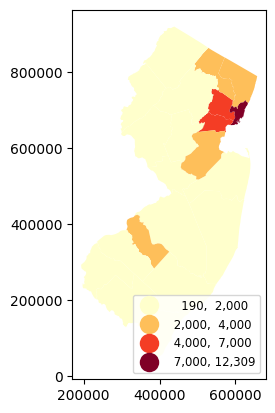

In [129]:
#your own classification: 2k looks like good cutoff, then 4k and 7k
njC.plot(column="POPDEN2010", scheme="user_defined", cmap="YlOrRd", classification_kwds={'bins':[2000, 4000, 7000]},
         linewidth=0, legend=True,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4})


### [oct5] subset shapefile

In [130]:
!wget -q -O us.zip https://github.com/theaok/data/raw/main/cb_2018_us_state_500k.zip
zip_ref = zipfile.ZipFile('us.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping

<Axes: >

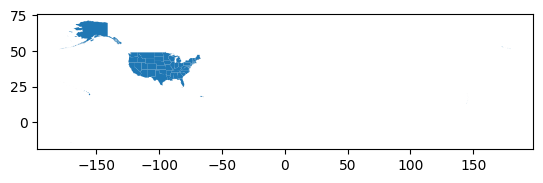

In [131]:
us=gpd.read_file('cb_2018_us_state_500k.shp')
us.plot()

<Axes: >

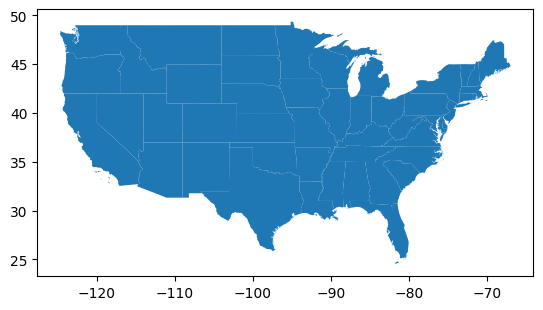

In [132]:
cont = us[~us['NAME'].isin(['Alaska', 'Hawaii', 'Puerto Rico','American Samoa','United States Virgin Islands','Guam','Commonwealth of the Northern Mariana Islands'])]
cont.plot()

or just google for what you want; even possibly with inset :)

https://www.google.com/search?client=firefox-b-1-d&q=uss+hapefile+alaska+perto+rico+inset

or:

https://www.google.com/search?client=firefox-b-1-d&q=coniguous+us+states+shapefgile

eg:
https://cartographyvectors.com/map/1201-contiguous-us-with-states

### aggregate data: groupby+agg

make sure stuff matches 1:1, not 1:many, eg when you merge uni to counties, thats many:1, many uni per 1 county, need to aggregate first to a summary stats like sum!!!

In [133]:
! wget -q -O nj-counties.zip https://docs.google.com/uc?id=1xJDhcRCkgv7k4tNCa72Oog5bohV6dTB2&export=download
zip_ref = zipfile.ZipFile('nj-counties.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
njC0=gpd.read_file('nj_counties.shp') #load the shapefile with gpd as njC

In [134]:
!wget -q -O col.zip  https://docs.google.com/uc?id=1bb9KES6QDE7cleE4L38yQ7939LlXUHB5&export=download
zip_ref = zipfile.ZipFile('col.zip', 'r');zip_ref.extractall(); zip_ref.close()

col0 = gpd.read_file('2007_11_30_NJ_COLL_UNIV_njsp.shp')
col0.dtypes
col0.head(3)

ID              object
METLNKID        object
FEATTYPE        object
SECCLASS        object
NAME            object
AREA            object
PHONE           object
ADDRESS         object
ADDRESS2        object
CITY            object
STATE           object
ZIP             object
ZIPP4           object
COUNTY          object
FIPS            object
DIRECTIONS      object
EMERGTITLE      object
EMERGPHONE      object
EMERGEXT        object
CONTDATE        object
CONTHOW         object
GEODATE         object
GEOHOW          object
NAICSCODE       object
NAICSDESCR      object
GEOLINKID       object
X              float64
Y              float64
ST_VENDOR       object
ST_VERSION      object
GEOPREC         object
PHONELOC        object
QC_QA           object
DEGREE          object
ENROLL          object
geometry      geometry
dtype: object

,ID,METLNKID,FEATTYPE,SECCLASS,NAME,AREA,PHONE,ADDRESS,ADDRESS2,CITY,...,X,Y,ST_VENDOR,ST_VERSION,GEOPREC,PHONELOC,QC_QA,DEGREE,ENROLL,geometry
0,10273936,None,POINT,UNCLASSIFIED,RAMAPO COLLEGE OF NEW JERSEY,201,684-7500,505 RAMAPO VALLEY RD,None,MAHWAH,...,-74.177826,41.082642,NAVTEQ,2006Q4,BLOCKFACE,None,None,MASTER'S DEGREE,5538,POINT (580936.143 819465.262)
1,10273934,None,POINT,UNCLASSIFIED,NEW BRUNSWICK THEOLOGICAL SEMINARY,732,247-5241,17 SEMINARY PL,None,NEW BRUNSWICK,...,-74.448814,40.501346,NAVTEQ,2006Q4,BLOCKFACE,None,None,DOCTOR'S DEGREE,203,POINT (506358.894 607539.257)
2,10273932,None,POINT,UNCLASSIFIED,MONMOUTH UNIVERSITY,732,571-3400,400 CEDAR AVE,None,WEST LONG BRANCH,...,-74.003765,40.281505,NAVTEQ,2006Q4,BLOCKFACE,None,None,POST-MASTER'S CERTIFICATE,6351,POINT (630565.964 527840.459)


In [135]:
col=col0[['COUNTY','NAME','ENROLL']]
#col
col.ENROLL=col.ENROLL.astype(float)
col.sort_values(by='COUNTY',inplace=True)
col

<ipython-input-135-99d6ac683762>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  col.ENROLL=col.ENROLL.astype(float)
<ipython-input-135-99d6ac683762>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  col.sort_values(by='COUNTY',inplace=True)


,COUNTY,NAME,ENROLL
36,ATLANTIC,ATLANTIC CAPE COMMUNITY COLLEGE,6845.0
25,ATLANTIC,THE RICHARD STOCKTON COLLEGE OF NEW JERSEY,7035.0
0,BERGEN,RAMAPO COLLEGE OF NEW JERSEY,5538.0
33,BERGEN,FAIRLEIGH DICKINSON UNIVERSITY - METROPOLITAN ...,8237.0
37,BERGEN,BERGEN COMMUNITY COLLEGE,14762.0
...,...,...,...
62,SUSSEX,SUSSEX COUNTY COMMUNITY COLLEGE,3461.0
13,UNION,UNION COUNTY COLLEGE,10976.0
47,UNION,KEAN UNIVERSITY,12958.0
14,WARREN,CENTENARY COLLEGE,2460.0


In [136]:
colAgg=col.groupby('COUNTY').agg('sum')
colAgg
6845+7035==13880  #double check from previous table

#then can merge and map :)

<ipython-input-136-fa7f15dfc22f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  colAgg=col.groupby('COUNTY').agg('sum')


,ENROLL
COUNTY,
ATLANTIC,13880.0
BERGEN,30343.0
BURLINGTON,7888.0
CAMDEN,20058.0
CUMBERLAND,3260.0
ESSEX,65569.0
GLOUCESTER,15784.0
HUDSON,22915.0
MERCER,39979.0


True

### standardize and finer resolution

In [137]:
! wget -q -O nj-counties.zip https://docs.google.com/uc?id=1xJDhcRCkgv7k4tNCa72Oog5bohV6dTB2&export=download
zip_ref = zipfile.ZipFile('nj-counties.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
njC0=gpd.read_file('nj_counties.shp') #load the shapefile with gpd as njC
njC=njC0[['COUNTY','COUNTY_LAB','POP2010','POPDEN2010','SQ_MILES','geometry']]

<Axes: >

[]

[]

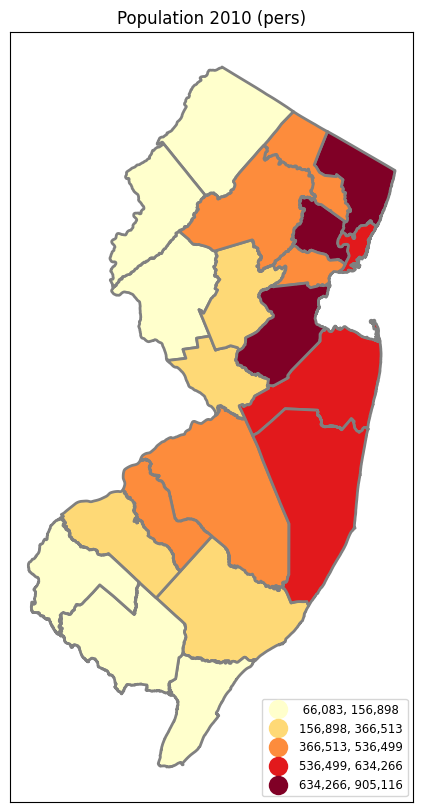

In [138]:
fig, ax = plt.subplots(1, figsize=(6,10))
njC.plot(ax=ax,column='POP2010',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
ax.title.set_text("Population 2010 (pers)")
ax.set_xticks([]); ax.set_yticks([])

In [139]:
njC['popDen10']=njC.POP2010/njC.SQ_MILES

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


<Axes: >

[]

[]

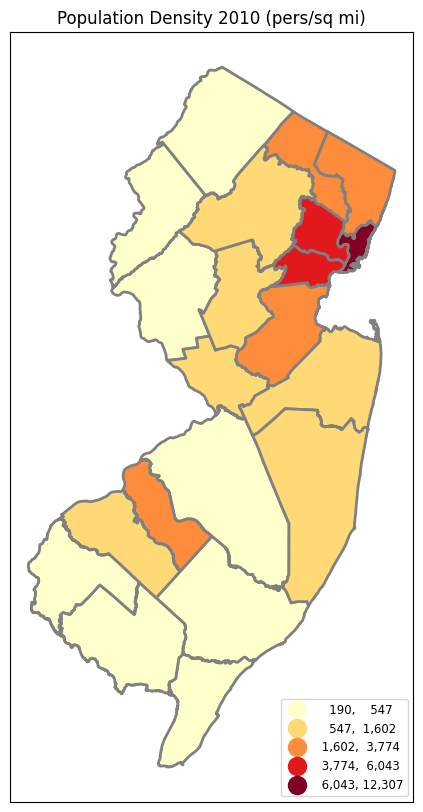

In [140]:
fig, ax = plt.subplots(1, figsize=(6,10))
njC.plot(ax=ax,column='popDen10',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
ax.title.set_text("Population Density 2010 (pers/sq mi)")
ax.set_xticks([]); ax.set_yticks([])

In [141]:
njM0=gpd.read_file('nj_munis.shp')
njM=njM0[['COUNTY','POP2010','POPDEN2010','SQ_MILES','geometry']]

<Axes: >

[]

[]

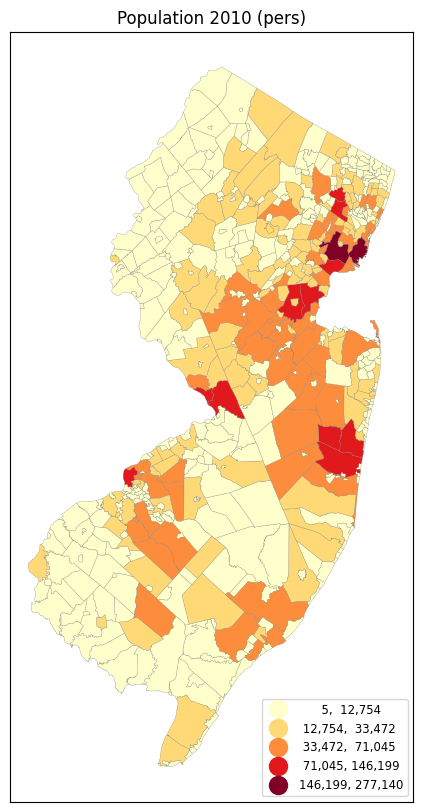

In [142]:
fig, ax = plt.subplots(1, figsize=(6,10))
njM.plot(ax=ax,column='POP2010',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
ax.title.set_text("Population 2010 (pers)")
ax.set_xticks([]); ax.set_yticks([])

### overlay and side-by side

<Axes: >

[]

[]

<Axes: >

[]

[]

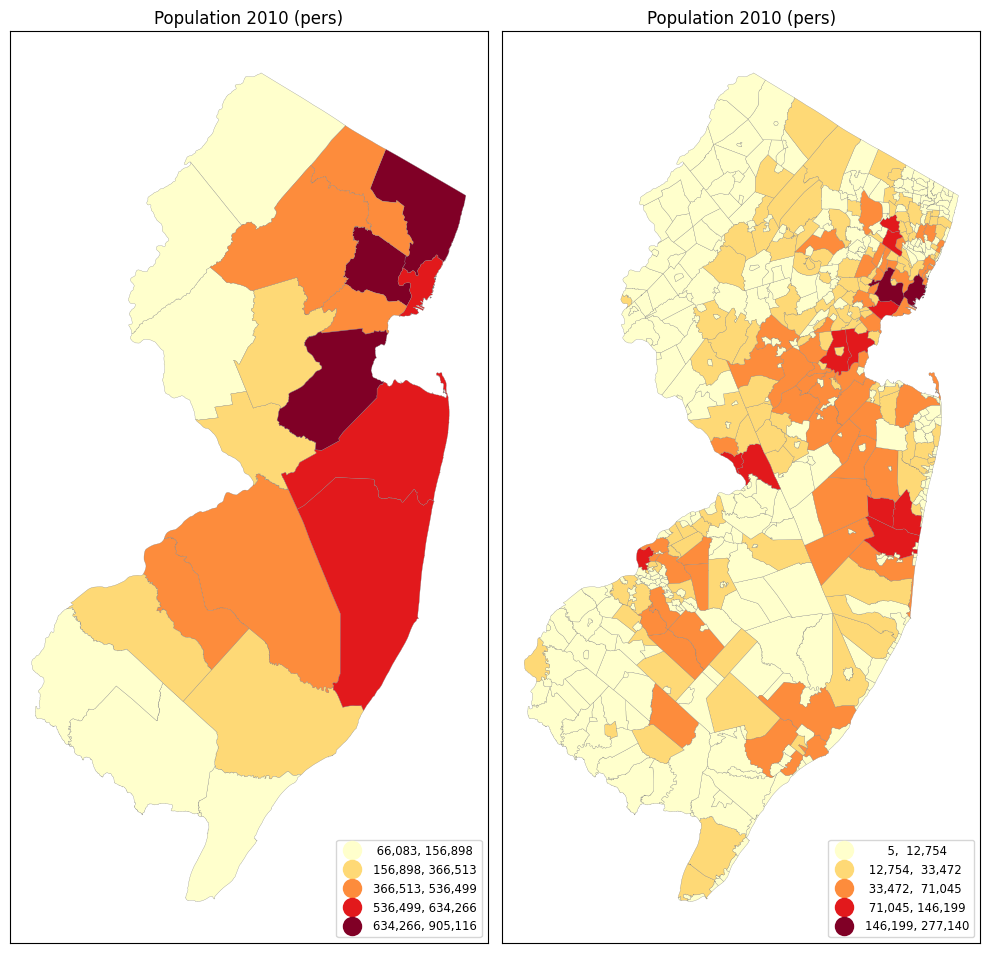

In [143]:
fig, axs = plt.subplots(1,2, figsize=(10,10),sharey=True, tight_layout=True)
njC.plot(ax=axs[0],column='POP2010',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
axs[0].title.set_text("Population 2010 (pers)")
axs[0].set_xticks([]); axs[0].set_yticks([])

njM.plot(ax=axs[1],column='POP2010',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
axs[1].title.set_text("Population 2010 (pers)")
axs[1].set_xticks([]); axs[1].set_yticks([])

<Axes: >

<Axes: >

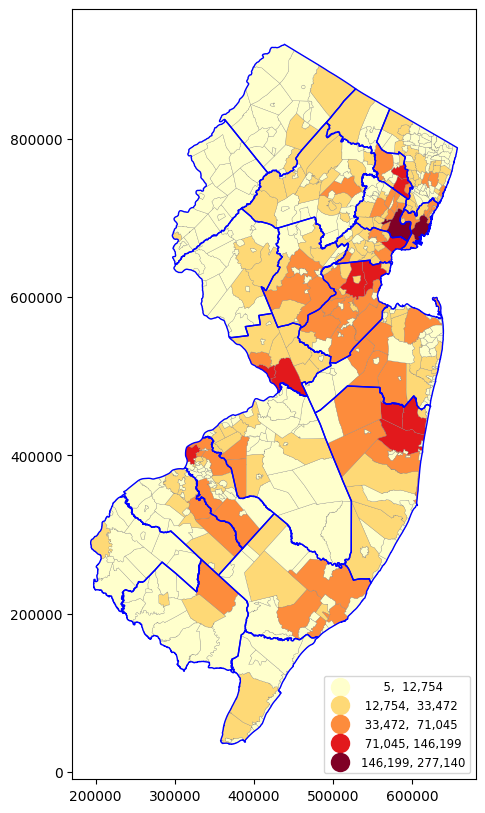

In [144]:
fig, ax = plt.subplots(1, figsize=(6,10))
njM.plot(ax=ax,column='POP2010',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4})
njC.plot(ax=ax,edgecolor='blue',linewidth=1, facecolor="none") #alpha=0.1)

In [145]:
njC.COUNTY

0       ATLANTIC
1         BERGEN
2     BURLINGTON
3         CAMDEN
4       CAPE MAY
5     CUMBERLAND
6          ESSEX
7     GLOUCESTER
8         HUDSON
9      HUNTERDON
10        MERCER
11      MONMOUTH
12         OCEAN
13       PASSAIC
14         SALEM
15      SOMERSET
16        SUSSEX
17         UNION
18        WARREN
19        MORRIS
20     MIDDLESEX
Name: COUNTY, dtype: object

to overlay 2 polygon layers, probably cleanest to just have 2 categories for the overlay: subset frist to some interesting area, and then overlay that

In [146]:
njC_cam_cum=njC.query("COUNTY=='CAMDEN' | COUNTY=='CUMBERLAND'")

<Axes: >

<Axes: >

'\n/   - diagonal hatching\n\\   - back diagonal\n|   - vertical\n-   - horizontal\n+   - crossed\nx   - crossed diagonal\no   - small circle\nO   - large circle\n.   - dots\n*   - stars\n'

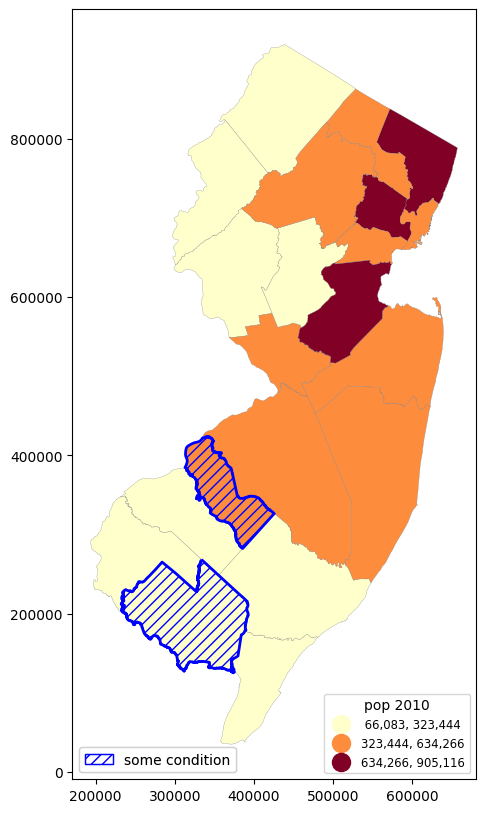

In [147]:
fig, ax = plt.subplots(1, figsize=(6,10))
njC.plot(ax=ax,column='POP2010',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=3,
         edgecolor='grey',linewidth=0.2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4})

#just like subset and hash or dot
#njC_cam_cum.plot(ax=ax,edgecolor='blue',linewidth=2, facecolor="none",alpha=1)
#njC_cam_cum.plot(ax=ax,edgecolor='blue',linewidth=2, facecolor="none",alpha=1,hatch='/')
njC_cam_cum.plot(ax=ax,edgecolor='blue',linewidth=2, facecolor="none",alpha=1,hatch='///')
'''
/   - diagonal hatching
\   - back diagonal
|   - vertical
-   - horizontal
+   - crossed
x   - crossed diagonal
o   - small circle
O   - large circle
.   - dots
*   - stars
'''

l1 = ax.get_legend()
l1.set_title('''pop 2010''')

import matplotlib.patches as mpatches

bluePatch = mpatches.Patch(edgecolor='blue', facecolor='none',
                     hatch='///', label=r'some condition')

l2=plt.legend(handles=[bluePatch],loc='lower left')

ax.add_artist(l2)
ax.add_artist(l1)


#njC.plot(ax=ax,edgecolor='blue',linewidth=1, facecolor="none") #alpha=0.1)

<Axes: >

<Axes: >

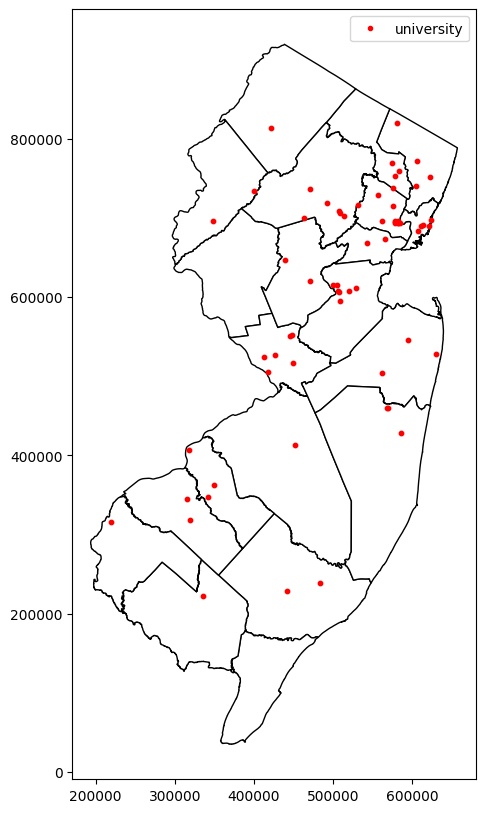

In [148]:
#overlay with points, same as earlier under sec: dive...
!wget -q -O col.zip  https://docs.google.com/uc?id=1bb9KES6QDE7cleE4L38yQ7939LlXUHB5&export=download
zip_ref = zipfile.ZipFile('col.zip', 'r');zip_ref.extractall(); zip_ref.close()

col = gpd.read_file('2007_11_30_NJ_COLL_UNIV_njsp.shp')

#overlay: just use plot fn twice
fig, ax = plt.subplots(1, figsize=(6,10))
njC.plot(ax=ax, color='white', edgecolor='black',linewidth=1)
col.plot(ax=ax, marker='o', color='red', markersize=10,legend=True)
#col.plot(column='enr',markersize=50,legend=True,cmap='RdYlGn_r',scheme='QUANTILES',k=5,ax=ax)
#ax.set_title('Watersheds by area ($mi^2$)')

#custom legend
#https://stackoverflow.com/questions/39500265/how-to-manually-create-a-legend
#import matplotlib.patches as mpatches
#red_patch = mpatches.Patch(color='red', label='The red data')
from matplotlib.lines import Line2D
point = Line2D([0], [0], label='university', marker='o', markersize=3,
         markeredgecolor='r', markerfacecolor='r', linestyle='')
plt.legend(handles=[point])

<Axes: >

<Axes: >

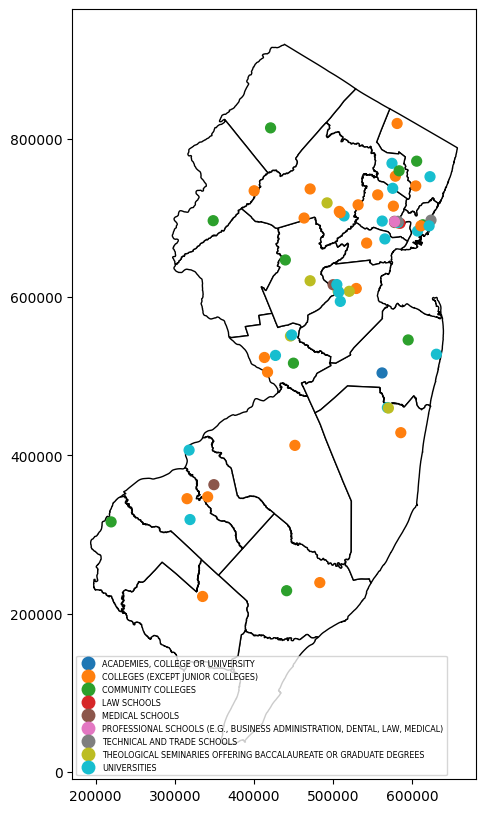

In [149]:
from pandas.core.interchange.dataframe_protocol import Column
!wget -q -O col.zip  https://docs.google.com/uc?id=1bb9KES6QDE7cleE4L38yQ7939LlXUHB5&export=download
zip_ref = zipfile.ZipFile('col.zip', 'r');zip_ref.extractall(); zip_ref.close()

col = gpd.read_file('2007_11_30_NJ_COLL_UNIV_njsp.shp')

#overlay: just use plot fn twice
fig, ax = plt.subplots(1, figsize=(6,10))
njC.plot(ax=ax, color='white', edgecolor='black',linewidth=1)
col.plot(ax=ax, marker='o',markersize=50,legend=True,column='NAICSDESCR',
         legend_kwds= {
        'loc':'lower left','title_fontsize':'medium','fontsize':'xx-small','markerscale':1.0})
#ok first stab, but too cluttered; group into like say max 5 cats

#### add to canvas anything: turn anything into img eg pd styler

In [150]:
!pip install imgkit
!sudo apt-get install wkhtmltopdf
import imgkit

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  avahi-daemon bind9-host bind9-libs geoclue-2.0 glib-networking
  glib-networking-common glib-networking-services gsettings-desktop-schemas
  iio-sensor-proxy libavahi-core7 libavahi-glib1 libdaemon0 libevdev2
  libfontenc1 libgudev-1.0-0 libhyphen0 libinput-bin libinput10
  libjson-glib-1.0-0 libjson-glib-1.0-common liblmdb0 libmaxminddb0
  libmbim-glib4 libmbim-proxy libmd4c0 libmm-glib0 libmtdev1 libnl-genl-3-200
  libnotify4 libnss-mdns libproxy1v5 libqmi-glib5 libqmi-proxy libqt5core5a
  libqt5dbus5 libqt5gui5 libqt5network5 libqt5positioning5 libqt5printsupport5
  libqt5qml5 libqt5qmlmodels5 libqt5quick5 libqt5sensors5 libqt5svg5
  libqt5webchannel5 libqt5webkit5 libqt5widgets5 libsoup2.4-1
  libsoup2.4-common libudev1 libwacom-bin libwacom-common libwacom9 libwoff1
  libxcb-icccm4 libxcb-image0 libxcb-keysyms1 libxcb-render-util0 

In [151]:
! wget -q -O nj-counties.zip https://docs.google.com/uc?id=1xJDhcRCkgv7k4tNCa72Oog5bohV6dTB2&export=download
zip_ref = zipfile.ZipFile('nj-counties.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
njC0=gpd.read_file('nj_counties.shp') #load the shapefile with gpd as njC

njC=njC0[['COUNTY','COUNTY_LAB','POP2010','POPDEN2010','geometry']]


In [152]:
njCs = njC[['COUNTY','POP2010']].sort_values(by='POP2010', ascending=False)
sty = njCs.style.background_gradient(cmap='YlOrRd')
sty

,COUNTY,POP2010
1,BERGEN,905116
20,MIDDLESEX,809858
6,ESSEX,783969
8,HUDSON,634266
11,MONMOUTH,630380
12,OCEAN,576567
17,UNION,536499
3,CAMDEN,513657
13,PASSAIC,501226
19,MORRIS,492276


In [153]:
imgkit.from_string(sty.to_html(), 'sty.jpg')

import matplotlib.image as mpimg
img = mpimg.imread('sty.jpg')
plt.imshow(img)

OSError: ignored

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(10,5),tight_layout=True)
njC.plot(ax=axs[0],column='POP2010',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
axs[0].title.set_text("Population 2010 (pers)")
axs[0].set_xticks([]); axs[0].set_yticks([])

axs[1].imshow(img,aspect='auto') #,  extent=[0,1,0,1]  aspect=3.5
axs[1].set_axis_off()
axs[1].set_xticks([]); axs[1].set_yticks([])

### centroids thematic maps

In [ ]:
njP = njC.copy()

njP["geometry"] = njP["geometry"].centroid

In [ ]:
njP.head(3)

In [ ]:
njP.plot()

In [ ]:
ax=njC.plot() #https://stackoverflow.com/questions/38899190/geopandas-label-polygons
for x, y, label in zip(njP.geometry.x, njP.geometry.y, njP.COUNTY):
    ax.annotate(label, xy=(x, y),horizontalalignment='center', fontsize=4) #ytext=(3, 3), textcoords="offset points"

In [ ]:
fig, ax = plt.subplots(1, figsize=(6,10))
njP.plot(ax=ax,column='POP2010',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4},
         markersize = 200) #
ax.title.set_text("Population 2010 (pers)")
ax.set_xticks([]); ax.set_yticks([])

In [ ]:
fig, ax = plt.subplots(1, figsize=(6,10))
njC.plot(ax=ax,column='POP2010',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower left','title_fontsize':'medium','fontsize':'small','markerscale':1.4})

l1 = ax.get_legend()
l1.set_title('''count''')

njP.plot(ax=ax,column='POPDEN2010',legend=True,cmap='Blues',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4},
         markersize = 200) #

ax.title.set_text("Population 2010")
ax.set_xticks([]); ax.set_yticks([])

l2 = ax.get_legend()
l2.set_title('''density''')



ax.add_artist(l2)
ax.add_artist(l1)

### basemap

https://geopandas.org/en/stable/gallery/plotting_basemap_background.html

In [ ]:
! pip install contextily
import contextily as cx

In [ ]:
njC = njC.to_crs(epsg=3857)

In [ ]:
ax = njC.plot(figsize=(10, 20), alpha=0.5, edgecolor="red")
#cx.add_basemap(ax)
cx.add_basemap(ax, source=cx.providers.Stamen.TonerLite)
#cx.add_basemap(ax, source=cx.providers.Stamen.Watercolor)
ax.set_axis_off()

### annotate

In [ ]:
fig, ax = plt.subplots(1, figsize=(6,10))
njC.plot(ax=ax,column='POP2010',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
ax.title.set_text("Population 2010 (pers)")

ax.text(400000, 800000, r'blah', fontsize=14, color='green')

from matplotlib.patches import Ellipse
e1 = Ellipse(xy=(400000, 800000), width=200000, height=300000, edgecolor='g', fc='None', lw=1)
ax.add_patch(e1)

### interactive and heat maps [skip]

https://geopandas.org/en/stable/docs/user_guide/interactive_mapping.html

https://nbviewer.org/gist/perrygeo/c426355e40037c452434 (heatmaps)

<br>we will use folium/leaflet later instead

# [oct12] other vis than gis/maps

it's gis--vis with maps, but do other vis too!

In [ ]:
#but first wiki
pd.read_html('https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_race/ethnicity',match="Mixed")[0].head(5) #for match use header of col; ideally unique; case may matter


In [ ]:

pd.read_html('https://en.wikipedia.org/wiki/List_of_towns_in_India_by_population',match="Name of Town")[0].head(5)
#pd.read_html("https://en.wikipedia.org/wiki/Premier_League", match = "Position")[0].head(3)
#https://towardsdatascience.com/how-to-use-wikipedia-as-a-data-source-3dfea29e6539
#https://towardsdatascience.com/2-easy-ways-to-get-tables-from-a-website-with-pandas-b92fc835e741 some more ideas

#note if bunch of tables and or cant easily fetch teh right one, just fetch them all
#and then select the right one
#tables=pd.read_html("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")
#tables[0]
#tables[1]
#etc

In [ ]:
import seaborn as sns

In [ ]:
auto=pd.read_stata('https://docs.google.com/uc?id=1YpkQ-RgAQfB_4olxtbfRWnVmKwkXml5N&export=download')

In [ ]:
auto[:10].style.background_gradient(cmap='Greens') #RdYlGn #https://seaborn.pydata.org/tutorial/color_palettes.html

In [ ]:
sns.heatmap(auto.corr().round(2),cmap="BrBG",annot=True) # RdYlGn love the colors!

In [ ]:
auto.mpg.hist()

In [ ]:
sns.jointplot(x ='mpg', y ='price', data = auto)

In [ ]:
import plotly.express as px #a quick simple one
import plotly.graph_objects as go #can get convoluted
import numpy as np

In [ ]:
px.scatter(auto, x="weight", y="mpg", color="price",
                  hover_data=['make'],width=1000,height=600)

In [ ]:
df = px.data.gapminder().query("year == 2007")
px.treemap(df, path=[px.Constant("world"), 'continent', 'country'], values='pop',
                 color='lifeExp', hover_data=['iso_alpha'],
                  color_continuous_scale='RdBu',
                 color_continuous_midpoint=np.average(df['lifeExp'], weights=df['pop']))

# [oct26] geo-processing

the class is really about thematic maps, what we've been doing so far; but sometimes you need to use some GIS data processing tools, there is a bunch, here just some more common ones

### I/O
(in gpd its fiona/gdal; btw ogr2ogr is very powerfull)

In [ ]:
import fiona; fiona.supported_drivers

# There is a list of available drivers which are unexposed but supported
# (depending on the GDAL-build).
# You can activate these on runtime
# by updating the supported_drivers dictionary like:
# fiona.supported_drivers["NAS"] = "raw"
fiona.supported_drivers['KML'] = 'rw'

In [ ]:
!wget -q -O nj-counties.zip https://docs.google.com/uc?id=1xJDhcRCkgv7k4tNCa72Oog5bohV6dTB2&export=download
zip_ref = zipfile.ZipFile('nj-counties.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
njC0=gpd.read_file('nj_counties.shp')
njC01=njC0[['COUNTY','COUNTY_LAB','POP2010','POPDEN2010','geometry']]

njC=njC01.copy()
njC['geometry'] = njC.simplify(tolerance=2000) #simplify geo (sec below)--important for online mapping
#njC.plot(figsize=(6,12), color='white', edgecolor='black',linewidth=1)

In [ ]:
njC.to_file('njC.kml', driver='KML')
!head -25 njC.kml #starts with ERROR:fiona._env:`njC.kml' not recognized as a supported file format.
#but still works fine; go to:
#https://www.google.com/maps/d/
#hit create new map and hit Import under layers at top right

In [ ]:
njC.to_file('njC.geojson', driver='GeoJSON')
!head -10 njC.geojson #coords in weird format

In [ ]:
a=gpd.read_file('njC.geojson')
a.plot() #works fine in gpd

In [ ]:
with open('test.geojson', 'w') as f:
    f.write(njC.to_json(to_wgs84=True))
!head test.geojson #proper coordinates now :)

In [ ]:
import folium as f
map = f.Map()
f.GeoJson('test.geojson').add_to(map)
map

### centroids

did already under bells and whistles

### geocoding

https://automating-gis-processes.github.io/CSC/notebooks/L3/Geocoding_in_Geopandas.html

In [ ]:
df=pd.read_csv('https://github.com/theaok/data/raw/main/addresses.txt',sep=';')
df=df[0:5]
df

In [ ]:
from geopandas.tools import geocode

In [ ]:
geo = geocode(df['addr'], provider='nominatim', user_agent='myName',timeout=2)
geo.head(2)

In [ ]:
geo.plot()

### map x y ( lat lon)

https://geopandas.org/en/stable/gallery/create_geopandas_from_pandas.html

In [ ]:
df = pd.DataFrame(
    {
        "City": ["Buenos Aires", "Brasilia", "Santiago", "Bogota", "Caracas"],
        "Country": ["Argentina", "Brazil", "Chile", "Colombia", "Venezuela"],
        "Latitude": [-34.58, -15.78, -33.45, 4.60, 10.48],
        "Longitude": [-58.66, -47.91, -70.66, -74.08, -66.86],
    }
)
df

In [ ]:
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude) #, crs="EPSG:4326"
)
#note the projection, may try with or without it: crs;
#if things map like in ocean or antarctica, email listserv

In [ ]:
gdf.plot()

### dissolve

In [ ]:
!wget -q -O IND.zip https://github.com/theaok/data/raw/main/GIS-INDIA-MAP.zip
zip_ref = zipfile.ZipFile('IND.zip', 'r'); zip_ref.extractall(); zip_ref.close()
i = gpd.read_file('INDIA-MAP.shp')

In [ ]:
i.shape #wow its a lot

In [ ]:
i.plot()

In [ ]:
states = i.dissolve(by='statename',aggfunc='sum').reset_index()
states = states[['statename', 'distarea', 'totalpopul','totpopmale', 'totpopfema', 'geometry']]
states['statename'] = states['statename'].str.upper()

In [ ]:
states.plot()

### simplify geo

In [ ]:
! wget -q -O nj-counties.zip https://docs.google.com/uc?id=1xJDhcRCkgv7k4tNCa72Oog5bohV6dTB2&export=download
zip_ref = zipfile.ZipFile('nj-counties.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
njC0=gpd.read_file('nj_counties.shp')
njC=njC0[['COUNTY','COUNTY_LAB','POP2010','POPDEN2010','geometry']]

In [ ]:
njC.dtypes

In [ ]:
njC.plot(figsize=(6,12), color='white', edgecolor='black',linewidth=1)

In [ ]:
njC1=njC.copy()
njC1['geometry'] = njC1.simplify(tolerance=2000)
njC1.plot(figsize=(6,12), color='white', edgecolor='black',linewidth=1)

### [*] projections

skip but if things get weird--mutated shapes, NJ in Pacific, then you have a projection problem

https://automating-gis-processes.github.io/CSC/notebooks/L2/projections.html

In [ ]:
!wget -q -O us.zip https://github.com/theaok/data/raw/main/cb_2018_us_state_500k.zip
zip_ref = zipfile.ZipFile('us.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
us=gpd.read_file('cb_2018_us_state_500k.shp')
#us.plot()
cont = us[~us['NAME'].isin(['Alaska', 'Hawaii', 'Puerto Rico','American Samoa','United States Virgin Islands','Guam','Commonwealth of the Northern Mariana Islands'])]
cont.plot()

In [ ]:
cont.crs

In [ ]:
cont.to_crs(epsg=3035).plot()

### [*] point in polygon/intersect, spatial join, nearest neighb

https://automating-gis-processes.github.io/CSC/notebooks/L4/Point-in-polygon.html

https://automating-gis-processes.github.io/CSC/notebooks/L4/spatial-join.html

https://automating-gis-processes.github.io/CSC/notebooks/L4/nearest-neighbour.html

# raster

using rasterio

https://rasterio.readthedocs.io/en/latest/topics/plotting.html

https://geopandas.org/en/stable/gallery/geopandas_rasterio_sample.html

can get sat img straight to python, via API, eg

https://carpentries-incubator.github.io/geospatial-python/05-access-data/

https://sites.northwestern.edu/researchcomputing/2021/11/19/downloading-satellite-images-made-easy/

https://earthengine.google.com/timelapse/


but here we do images by hand: data from:

https://newjersey.maps.arcgis.com/apps/webappviewer/index.html?id=d13ac68c0d0f46139673824bbf19ad66

In [ ]:
!pip install rasterio
import rasterio
import matplotlib.pyplot as plt

In [ ]:
!wget -q -O tile145.tif https://njogis-imagery.s3-us-west-2.amazonaws.com/1930/cog/tile145.tif
src = rasterio.open("tile145.tif")
src.bounds

In [ ]:
fig, ax = plt.subplots(figsize=(20, 16))
#ax.set_ylabel('price')
#ax.set_xlabel('sdsa')
ax.set_ylim([3000,2000])
ax.set_xlim([2000,3000])
#ax.set_aspect(1/3)

ax.imshow(src.read(1)) #, aspect='auto',extent=[1500,5000,2000,20000]
#zorder=1,alpha=.6,interpolation='nearest'

#blurry, but still pretty awesome as for 1930!

In [ ]:
#250mb each! give it like 20sec to download
!wget -q -O D13C14-07.tif https://njogis-imagery.s3-us-west-2.amazonaws.com/2007/cog/D13C14.tif
src07 = rasterio.open("D13C14-07.tif")
!wget -q -O D13C14-20.tif https://njogis-imagery.s3.us-west-2.amazonaws.com/2020/cog/D13C14.tif
src20 = rasterio.open("D13C14-20.tif")
#src07.bounds

In [ ]:
fig, ax = plt.subplots(figsize=(20, 20))
#ax.set_ylabel('price')
#ax.set_xlabel('sdsa')
ax.set_ylim([5000,0])
ax.set_xlim([0,2000])
#ax.set_aspect(1/3)

ax.imshow(src07.read(1)) #, aspect='auto',extent=[1500,5000,2000,20000]
#zorder=1,alpha=.6,interpolation='nearest'

In [ ]:
#commented out to save space! 7mb these 2 images

#fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True,figsize=(20, 20)) #1row2col
#axs[0].imshow(src07.read(1))
#axs[1].imshow(src20.read(1))
#axs[0].set_ylim([5000,0])
#axs[0].set_xlim([0,2000])
#axs[1].set_ylim([5000,0])
#xs[1].set_xlim([0,2000]);

# \>\>\> will be updated from here >>>

### for nat sci people

https://www.pyngl.ucar.edu/Examples/gallery.shtml

https://cdat.llnl.gov/gallery.html

## notes to myself

TODO if anything go thru gpd again esp as more features being added!
<br>

the whole course, geo dat sci: [oct2023 not super urgent; skimmed thru it already]
https://darribas.org/gds_course/content/home.html

<br>oct2023 found 1 more; already incorporated most useful stuff , still  a useful reference:

old  version:
https://automating-gis-processes.github.io/CSC/index.html

new version:
https://autogis-site.readthedocs.io/en/latest/



<br>
LATER/MAYBE: [oct2023 but meh not clear advantage over gpd/folium]
 basemap! guess the first one! used to use it, but dead, depreciated in favor of cartopy
https://jakevdp.github.io/PythonDataScienceHandbook/04.13-geographic-data-with-basemap.html